In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [25]:
from bokeh.layouts import column,row,layout
from bokeh.models import ColumnDataSource, Slider, RadioButtonGroup,TableColumn, DataTable, Range1d, LinearAxis
from bokeh.plotting import figure, output_file, show
from bokeh.themes import Theme
from bokeh.io import show, output_notebook, output_file, push_notebook
from bokeh.layouts import widgetbox
from bokeh.models.tools import HoverTool, PointDrawTool
#прочие
import pandas as pd
import numpy as np
from scipy import special
import os
import scipy as sp
import matplotlib.pyplot as plt
import pylab


output_notebook()

Loading BokehJS ...

In [2]:
pi=math.pi

In [17]:
#Fourier's law
def q_conduction(l,k,r0,ri,t0,ti):
    return 2*pi*k*(t0-ti)/np.log(r0/ri)
#Newton's law
def q_convection(ri,l,h,tf,ti):
    '''ri - pipe inside radius (m),
    l - pipe lenth (m)
    h - constant of proportionality called 'convective heat transfer
    coefficient (W/m2/C)'
    tf - fluid temperature (C)
    ti - inner wall temperature (C)
    
    '''
    return 2*pi*ri*l*h*(tf-ti)

In [73]:
print(q(10,1,0.9,0.8,20,10))

533.4541831227677


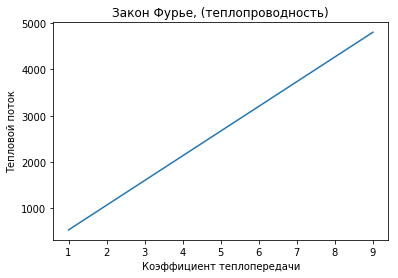

In [72]:
x=np.asarray(range(1,10))
y=q_conduction(10,x,0.9,0.8,20,10)
plt.plot(x,y)
plt.title('Закон Фурье, (теплопроводность)')
plt.xlabel('Коэффициент теплопередачи')
plt.ylabel('Тепловой поток')
plt.show()   



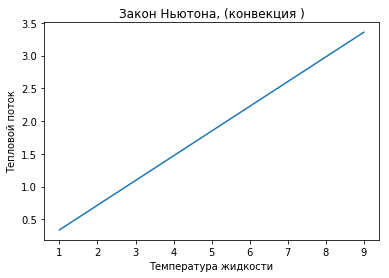

In [20]:
x=np.asarray(range(1,10))
y=q_convection(0.06,1,1,x,0.1)
plt.plot(x,y)
plt.title('Закон Ньютона, (конвекция )')
plt.xlabel('Температура жидкости')
plt.ylabel('Тепловой поток')
plt.show()   

## Исходные данные

In [67]:
depth_m=2560  #глубина скважины
rto_m=73/2/1000 #внешний радиус НКТ
rti_m=61/2/1000 #внутренний радиус НКТ
rcasi_m=120/2/1000 #внутренний радиус ОК
rcaso_m=143/2/1000 #внешний радиус ОК
rwb_m=300/2/1000 #внешний радиус скважины (после цемента)

teibh_c=80 #начальная пластовая температура на забое

geoterm_gradm=0.03 #геотермический градиент, С/м


ke_dsmc=2.4 #Теплопроводность породы, Дж/сек/м/С
kcem_dsmc=4 #Теплопроводность цемента, Дж/сек/м/С
ke_dsmc=2.4 #Теплопроводность породы, Дж/сек/м/С
kaliq_dsmc=200 #conductivity of annular fluid, ???
#Теплопередача за счет конвекции через жидкость Дж/сек/м2/С ???
kagas_dsmc=20 #Теплопередача за счет конвекции через газ Дж/сек/м2/С ???

rho_oil_kgm3=860
rho_water_kgm3=1000
cp_oil=2100 #теплоемкость нефти, Дж/кг/С
cp_water=4100 #теплоемкость воды, Дж/кг/С






In [70]:
dh=np.asarray(range(0,depth_m,10)) #Массив глубины по стволу скважины
tei=(dh[-1]-dh)*geoterm_gradm*(-1)+teibh_c #Температура пласта по стволу в нач.усл.

In [71]:
plot = figure(title='Распределение температуры',
               x_axis_label='Tемпература, °C',
               y_axis_label='Абсолютная глубина (TVD),м',
              y_range=(dh[-1],dh[0]),
              
            )
plot.line(tei,dh,legend='Геотерма')
show(plot)               